In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

In [2]:
from tensorflow.keras.datasets import fashion_mnist

In [3]:
(X_train, y_train), (X_test, y_test) = fashion_mnist.load_data() # โหลดชุดข้อมูล Fashion MNIST ซึ่งประกอบด้วยภาพเสื้อผ้า 28x28 พิกเซล จำนวน 60,000 รูป (train) 
# และ 10,000 รูป (test) พร้อม label

29515/29515 ━━━━━━━━━━━━━━━━━━━━ 0s 2us/step
26421880/26421880 ━━━━━━━━━━━━━━━━━━━━ 2s 0us/step
5148/5148 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
4422102/4422102 ━━━━━━━━━━━━━━━━━━━━ 2s 0us/step


In [4]:
X_train.shape, y_train.shape, X_test.shape, y_test.shape 

((60000, 28, 28), (60000,), (10000, 28, 28), (10000,))

In [5]:
def show_item(item):
    plt.imshow(item, cmap="binary")
    
    
# 🧩 def show_item(item):
# สร้างฟังก์ชันชื่อ show_item ที่รับพารามิเตอร์ชื่อ item (ซึ่งคือภาพ 2D จาก MNIST)
# 🖼️ plt.imshow(item, cmap="binary")
# ใช้ matplotlib แสดงภาพที่รับมา โดยใช้โหมดสี "binary" (คือสีขาว-ดำ)
# 🎯 show_item(X_train[555])
# เรียกใช้ฟังก์ชันเพื่อแสดงภาพที่ index 555 จากชุด X_train ซึ่งก็คือภาพของเสื้อผ้าชิ้นหนึ่งในชุด training data
# ผลลัพธ์:
# คุณจะเห็นภาพขาวดำของเสื้อผ้าชิ้นหนึ่งบนกราฟ (เช่น เสื้อยืด, รองเท้าผ้าใบ ฯลฯ)

# 💡 ถ้าอยากให้เห็นด้วยว่า label (คือภาพนี้คืออะไร) ก็สามารถทำเพิ่มแบบนี้ได้:

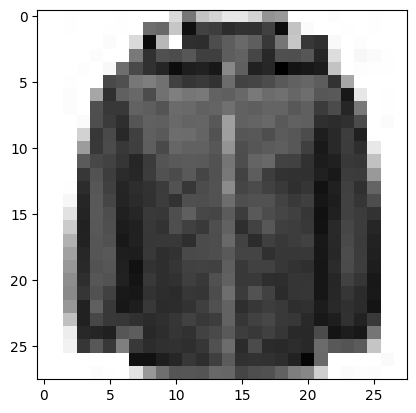

In [6]:
show_item(X_train[555])

In [7]:
X_train.min(), X_train.max()

(0, 255)

In [8]:
X_tr = X_train / X_train.max()
X_te = X_test / X_test.max()

In [10]:
from tensorflow.keras import Sequential # นำเข้า Sequential ซึ่งเป็นโมเดลแบบเรียงลำดับ (layer-by-layer) เหมาะสำหรับโมเดลที่มีโครงสร้างไม่ซับซ้อนมาก
from tensorflow.keras.layers import InputLayer, Conv2D, MaxPool2D, Flatten, Dense, Dropout

# 👆 นำเข้า layer ต่าง ๆ ที่ใช้ประกอบเป็น CNN:
# 🟦 InputLayer: ระบุขนาด input ของข้อมูล เช่น (28, 28, 1) สำหรับภาพขาวดำ 28x28
# 🧠 Conv2D: convolutional layer สำหรับดึงฟีเจอร์จากภาพ (ใช้ filter เลื่อนผ่านภาพ)
# 🌀 MaxPool2D: ลดขนาดภาพโดยเลือกค่าที่มากที่สุดในแต่ละพื้นที่ย่อย (downsampling)
# 🔁 Flatten: แปลงข้อมูลจากภาพ 2D ให้อยู่ในรูปแบบ vector 1D ก่อนส่งเข้า fully connected layer
# 🔲 Dense: fully connected layer (ใช้ในขั้นตอนตัดสินว่าเป็นคลาสไหน)
# 🚫 Dropout: ใช้ลดการ overfitting โดยสุ่มปิดบาง neuron ขณะ train

CNN Architechture: Input => CV1 => MP1 => CV2 => MP2 => Flatten => D1 => Output

CNN Input Images must be 4D ==> (Array of 3D (Width, Height, Channels))

In [9]:
X_tr = X_tr.reshape(X_tr.shape[0],X_tr.shape[1], X_tr.shape[2], -1)
X_te = X_te.reshape(X_te.shape[0],X_te.shape[1], X_te.shape[2], -1)

# คุณใช้ .reshape() เพื่อเพิ่มมิติ channel ให้กับภาพ จากเดิมที่เป็น (28, 28) → เป็น (28, 28, 1)
# X_tr.shape[0] → จำนวนภาพทั้งหมดในชุด train
# X_tr.shape[1], X_tr.shape[2] → ความสูงและความกว้างของภาพ (28x28)
# -1 → ให้ NumPy คำนวณขนาดมิติสุดท้ายให้อัตโนมัติ (ในที่นี้จะเป็น 1, เพราะข้อมูลเป็นภาพขาวดำ)


# จากเดิม:
# รูปภาพแต่ละรูปมี shape = (28, 28)

# หลัง reshape:
# รูปภาพแต่ละรูปมี shape = (28, 28, 1)

# ซึ่งจำเป็นสำหรับโมเดล CNN เพราะ layer อย่าง Conv2D ต้องการ input แบบ 3 มิติ (H, W, C)


In [11]:
X_tr.shape, X_te.shape

((60000, 28, 28, 1), (10000, 28, 28, 1))

In [12]:
model = Sequential()

In [13]:
input_layer = InputLayer(shape=(X_tr.shape[1],X_tr.shape[2],X_tr.shape[3]))
model.add(input_layer)



# InputLayer(...): กำหนดรูปร่างของข้อมูลที่โมเดลจะรับเข้ามา
# shape=(28, 28, 1): รูปร่างของภาพแต่ละภาพ (สูง 28, กว้าง 28, 1 ช่องสี)
# model.add(...): เพิ่ม input layer เข้าไปในโมเดลที่คุณกำหนดไว้ก่อนหน้านี้ (ผ่าน Sequential())

In [15]:
mp1_kernel_size = [2,2]
mp1_strides = [2,2]
mp1 = MaxPool2D(pool_size=mp1_kernel_size, strides=mp1_strides)
model.add(mp1)


# 🔍 รายละเอียด:
# mp1_kernel_size = [2, 2]:
# กำหนดขนาดของ filter (หรือ window) ที่จะใช้ในการ max pooling เป็น 2x2 

# Max Pooling คือเทคนิคหนึ่งใน Convolutional Neural Networks (CNNs) ที่ใช้เพื่อลดขนาดของภาพ (หรือ feature maps) อย่างมีประสิทธิภาพ โดย:

# ลดจำนวนพารามิเตอร์และการคำนวณ (ทำให้โมเดลเร็วขึ้น)
# ดึงข้อมูลสำคัญออกมา และลด noise
# ช่วยให้โมเดลไม่ overfitting ง่ายเกินไป


# mp1_strides = [2, 2]:
# ระยะการเลื่อนของ filter ก็คือเลื่อน 2 พิกเซลในแนวนอนและแนวตั้ง
# MaxPool2D(...):
# สร้างเลเยอร์ Max Pooling ซึ่งช่วยลดขนาดของ feature maps ลงโดยการเลือกค่ามากที่สุดในแต่ละ window (เช่น จาก 28x28 → 14x14 ถ้าใช้ 2x2 kernel และ stride 2)
# model.add(mp1):
# เพิ่มเลเยอร์ max pooling นี้เข้าไปในโมเดล

In [16]:
mp2_kernel_size = [2,2]
mp2_strides = [2,2]
mp2 = MaxPool2D(pool_size=mp2_kernel_size, strides=mp2_strides)
model.add(mp1)

| ทำ MaxPooling 1 ครั้ง   | ทำหลายครั้ง (แนะนำ)              |
| ----------------------- | -------------------------------- |
| ลดขนาดได้รอบเดียว       | ลดขนาดทีละน้อยอย่างมีลำดับ       |
| ฟีเจอร์ยังหยาบ          | ฟีเจอร์มีลำดับชั้น ชัดขึ้น       |
| อาจไม่พอสำหรับข้อมูลภาพ | ได้ภาพย่อส่วนที่มีฟีเจอร์เข้มข้น |


In [ ]:
# 🔍 เหตุผลที่ใช้ Max Pooling หลายรอบ (หลายเลเยอร์):

# 1. 🧠 CNN เรียนรู้จากลำดับของฟีเจอร์:
# CNN ทำงานแบบลำดับ: จาก "ขอบภาพ" → "รูปร่าง" → "ส่วนประกอบ" → "วัตถุ"
# เมื่อภาพถูกส่งผ่าน Conv2D แต่ละชั้น มันจะดึงฟีเจอร์ที่ซับซ้อนมากขึ้น
# MaxPooling จะค่อย ๆ ลดขนาดภาพลง (เช่น 28×28 → 14×14 → 7×7) ขณะยังรักษาข้อมูลสำคัญไว้
# 2. 🪶 ลดขนาด feature maps ทีละน้อย ไม่ให้เร็วเกินไป:
# ถ้าคุณทำ MaxPooling แค่ครั้งเดียว แต่ stride ใหญ่มาก → ข้อมูลหายไปเยอะเกินไป
# การทำหลายชั้นด้วยขนาด 2×2 จะค่อย ๆ บีบให้ข้อมูลเล็กลงอย่างนุ่มนวล
# 3. ⚡ ลดจำนวนพารามิเตอร์ + ลดเวลาประมวลผล:
# รูปเล็กลง → layer ถัดไปทำงานไวขึ้น + มีพารามิเตอร์น้อยลง
# ทำให้โมเดลเร็วขึ้น และลดโอกาส overfitting
# 4. 🎯 ช่วยเน้น "สิ่งสำคัญ" ในภาพ:
# MaxPooling จะรักษาเฉพาะ "จุดเด่นที่สุด" ของแต่ละบริเวณไว้
# เมื่อทำหลายรอบ จะช่วยให้โมเดล "โฟกัส" เฉพาะฟีเจอร์ที่สำคัญที่สุด

In [17]:
model.add(Flatten()) 

# Flatten: ฟังก์ชันนี้จะทำให้ข้อมูลที่เป็น matrices (เช่น 2D) ที่ได้จากการทำ Convolution หรือ MaxPooling กลายเป็น vector 1D เพื่อให้สามารถป้อนเข้าไปใน fully connected layers (เช่น Dense layer) ได้
# ตัวอย่างเช่น ถ้าขนาดของ feature map หลังจาก MaxPooling คือ (7, 7, 64) (7x7 และมี 64 channels) หลังจาก Flatten จะกลายเป็น vector ขนาด (7 * 7 * 64) = 3136

In [18]:
d1 = Dense(128, activation='relu')
model.add(d1)

# Dense(128, activation='relu'):
# เพิ่ม Dense layer ที่มี 128 neurons (หรือ units) และใช้ฟังก์ชันการเปิดใช้งาน ReLU (Rectified Linear Unit)
# ฟังก์ชัน ReLU ช่วยให้โมเดลมีความสามารถในการเรียนรู้ฟังก์ชันที่ไม่เป็นเชิงเส้น
# Dense layer นี้จะทำการคำนวณ dot-product ระหว่าง input vector ที่ได้รับจาก Flatten และ weight vector ภายใน layer

In [19]:
d2 = Dense(64, activation='relu')
model.add(d2)

# Dense(64, activation='relu'):
# Dense: คือ fully connected layer ที่แต่ละ neuron จะเชื่อมโยงกับ neuron ทุกตัวในชั้นก่อนหน้า
# 64: จำนวน neurons (หรือ units) ในชั้นนี้ คือจะมี 64 neurons ใน Dense layer นี้
# activation='relu': ฟังก์ชันการเปิดใช้งาน ReLU (Rectified Linear Unit) จะทำให้ output เป็น 0 ถ้า input เป็นลบ และถ้า input เป็นบวกจะส่งผ่านค่าดังกล่าวไป (เหมาะสำหรับโมเดลที่ต้องการให้โมเดลเรียนรู้ฟังก์ชันที่ไม่เป็นเชิงเส้น)
# ✅ การทำงานของมัน:
# Output จาก Layer ก่อนหน้า: ค่า output จาก layer ก่อนหน้านี้จะถูกส่งเข้าไปใน Dense(64) layer นี้
# การคำนวณ: คำนวณ dot product ระหว่าง input vector (จาก Flatten หรือ Dense layer ก่อนหน้า) และ weights ของ neurons ใน layer นี้
# ReLU Activation: ผ่านฟังก์ชัน ReLU ซึ่งจะช่วยให้โมเดลสามารถเรียนรู้ได้ดีขึ้นโดยไม่ต้องมีปัญหากับข้อมูลที่เป็นลบ

In [20]:
NUM_LABELS = len(np.unique(y_train))
NUM_LABELS


# np.unique(y_train):
# ฟังก์ชัน np.unique() ใช้เพื่อหาค่าที่ไม่ซ้ำใน array หรือ list
# ในที่นี้ y_train คือ label หรือข้อมูลผลลัพธ์ที่ตรงกับภาพใน X_train ซึ่งอาจจะเป็นตัวเลขที่แทนประเภทของภาพ (เช่น เสื้อผ้าต่าง ๆ ในชุดข้อมูล Fashion MNIST)
# np.unique(y_train) จะให้ผลลัพธ์เป็น array ของค่าที่ไม่ซ้ำใน y_train
# len(np.unique(y_train)):
# ฟังก์ชัน len() ใช้เพื่อหาจำนวนขององค์ประกอบใน array
# ดังนั้น len(np.unique(y_train)) จะให้จำนวนประเภททั้งหมดที่มีใน y_train ซึ่งคือจำนวนคลาส (หรือ labels) ที่แตกต่างกัน
# NUM_LABELS:
# ค่าที่ได้จากการใช้ len(np.unique(y_train)) จะถูกเก็บไว้ในตัวแปร NUM_LABELS
# ตัวแปรนี้จะแสดงจำนวนคลาสทั้งหมดที่มีในชุดข้อมูล (ในที่นี้คือจำนวนประเภทต่าง ๆ ของชุดข้อมูล)

10

In [21]:
LABELS = ['T-Shirt/top','Trouser','Pullover','Dress','Coat','Sandal','Shirt',
          'Sneaker','Bag','Ankle boot']

In [22]:
def grid_plot(start_index):
    plt.figure(figsize=(8,8))
    numpic = 25
    for i in range(start_index, start_index + numpic):
        plt.subplot(5,5, i + 1 - start_index)
        plt.xticks([])
        plt.yticks([])
        plt.grid(False)
        plt.imshow(X_train[i], cmap='binary')
        plt.xlabel(LABELS[y_train[i]])
    plt.show()

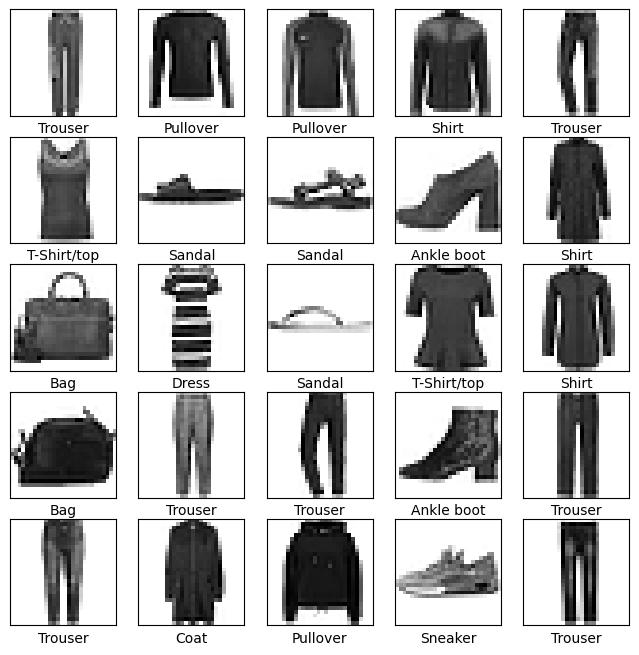

In [23]:
grid_plot(1000)

In [24]:
output_layer = Dense(NUM_LABELS, activation='softmax')
model.add(output_layer)

# Dense(NUM_LABELS):
# NUM_LABELS คือจำนวนของประเภท (หรือคลาส) ที่โมเดลจะต้องจำแนก
# หากคุณใช้ชุดข้อมูล Fashion MNIST ซึ่งมี 10 ประเภท (เสื้อยืด, กางเกง, รองเท้า ฯลฯ) ค่าของ NUM_LABELS จะเป็น 10
# ดังนั้น Dense(NUM_LABELS) จะสร้าง output layer ที่มี 10 neurons (หรือ units)
# activation='softmax':
# Softmax เป็นฟังก์ชันการเปิดใช้งานที่ใช้ใน classification problems โดยเฉพาะการจำแนกประเภทหลาย ๆ คลาส (multi-class classification)
# ฟังก์ชัน softmax จะแปลงค่า output ของ neurons ใน output layer ให้กลายเป็นความน่าจะเป็นของแต่ละคลาส (เช่น ค่าของ output layer จะอยู่ในช่วง 0 ถึง 1 และรวมกันทั้งหมดจะเท่ากับ 1)
# ฟังก์ชันนี้จะช่วยให้โมเดลสามารถทำนายได้ว่าแต่ละ input (ภาพ) น่าจะอยู่ในคลาสไหนจาก 10 คลาสนั้น

In [25]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 7, 7, 1)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 7, 7, 1)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 49)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │         6,400 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 10)             │           650 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 15,306 (59.79 KB)

 Trainable params: 15,306 (59.79 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])


# 1. model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# optimizer='adam':
# ใช้ Adam optimizer ซึ่งเป็น optimizer ที่มีการปรับค่าการเรียนรู้ (learning rate) โดยอัตโนมัติและมักจะได้ผลดีในหลาย ๆ ปัญหา
# Adam optimizer ใช้การคำนวณ momentum และ adaptive learning rate ทำให้มันเหมาะสมกับโมเดลที่ซับซ้อน
# loss='sparse_categorical_crossentropy':
# sparse_categorical_crossentropy เป็น loss function ที่ใช้สำหรับการจำแนกประเภทหลายคลาส (multi-class classification) โดยที่ label ใน y_train เป็นค่า integer (ตัวเลข)
# ในกรณีของ Fashion MNIST, แต่ละ label คือ integer ระหว่าง 0 ถึง 9 ซึ่งหมายถึง 10 คลาสที่แตกต่างกัน
# metrics=['accuracy']:
# ตั้งค่าให้โมเดลใช้ accuracy เป็นเมตริกในการประเมินผลการฝึก
# accuracy คือเปอร์เซ็นต์ของการทำนายที่ถูกต้องเมื่อเทียบกับจำนวนทั้งหมด

In [ ]:
model.fit(X_tr, y_train, epochs=5)


# 2. model.fit(X_tr, y_train, epochs=5)

# X_tr: คือข้อมูลฝึก (training data) ซึ่งเป็นภาพขนาด 28x28x1 (สำหรับ Fashion MNIST)
# y_train: คือ label หรือประเภทของภาพใน X_tr (ตัวเลขระหว่าง 0 ถึง 9)
# epochs=5: โมเดลจะทำการฝึกซ้ำทั้งหมด 5 รอบ (epochs) โดยในแต่ละ epoch จะทำการฝึกโมเดลโดยใช้ข้อมูลทั้งหมดใน X_tr และ y_train

Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 607us/step - accuracy: 0.6502 - loss: 0.9543
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 676us/step - accuracy: 0.7627 - loss: 0.6230
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 561us/step - accuracy: 0.7789 - loss: 0.5797
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 570us/step - accuracy: 0.7882 - loss: 0.5589
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 693us/step - accuracy: 0.7902 - loss: 0.5424


In [ ]:
predictions = model.predict(X_te)


# 3. predictions = model.predict(X_te)

# model.predict(X_te):
# ใช้โมเดลที่ได้รับการฝึกแล้วในการทำนายผลลัพธ์สำหรับข้อมูลทดสอบ (testing data) ใน X_te
# X_te คือข้อมูลที่ไม่ได้ใช้ในการฝึก (testing data) ซึ่งมีลักษณะเหมือนกับ X_tr
# ฟังก์ชันนี้จะให้ผลลัพธ์เป็นความน่าจะเป็นของแต่ละคลาสสำหรับทุก ๆ ตัวอย่างใน X_te โดยที่ softmax ใน output layer จะแปลงค่าออกมาเป็นความน่าจะเป็น
# ผลลัพธ์จาก model.predict() จะเป็น array ที่มีขนาด (จำนวนตัวอย่างใน X_te, NUM_LABELS) โดยที่แต่ละแถวใน array จะเป็นความน่าจะเป็นของแต่ละคลาส

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 466us/step


In [ ]:
pred_result = np.argmax(predictions, axis=1)

# 1. pred_result = np.argmax(predictions, axis=1)

# predictions: เป็นผลลัพธ์ที่ได้จาก model.predict(X_te), ซึ่งเป็น array ของความน่าจะเป็นที่โมเดลคำนวณให้กับแต่ละคลาส
# ถ้า predictions มีขนาด (10000, 10) (สำหรับ Fashion MNIST ที่มี 10 คลาส), โดยที่แต่ละแถวจะเป็นความน่าจะเป็นของ 10 คลาสสำหรับแต่ละตัวอย่างใน X_test

In [30]:
print('Validating accuract', np.mean(pred_result == y_test))

Validating accuract 0.7867


In [31]:
def plot_image(i, pred_array, true_label, img):
    pred_result, true_label, img = pred_array[i], true_label[i], img[i]
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(img, cmap=plt.cm.binary)
    pred_label = np.argmax(pred_result)
    if pred_label == true_label:
        _color = 'blue'
    else:
        _color = 'red'
    plt.xlabel("{} {:2.0f}% ({})".format(LABELS[pred_label], 100 * np.max(pred_result),
                                             LABELS[true_label]), color=_color)

In [ ]:
def plot_prob_barchart(i, pred_array, true_label):
    pred_result, true_label = pred_array[i], true_label[i]
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])
    chart = plt.bar(range(len(LABELS)), pred_result, color="#777777")   # สีเทา (สี #777777) คือสีที่ใช้แสดงแท่งทั้งหมดที่ไม่ใช่คลาสที่โมเดลทำนายสูงสุดและไม่ใช่ label จริง

    plt.ylim([0,1])
    pred_label = np.argmax(pred_result)
    chart[pred_label].set_color('red')
    chart[true_label].set_color('blue')

ฟังก์ชัน `plot_image()` ที่คุณให้มา จะใช้สำหรับการแสดงภาพจากชุดข้อมูลที่โมเดลทำนาย พร้อมแสดงผลการทำนายและผลลัพธ์ที่แท้จริงในรูปแบบที่เข้าใจง่าย

### 📌 อธิบายทีละบรรทัด:

#### 1. **`pred_result, true_label, img = pred_array[i], true_label[i], img[i]`**

* **`pred_array[i]`**: ผลลัพธ์จากการทำนายของโมเดลในรูปแบบของความน่าจะเป็น (เช่น array ที่มี 10 ค่าความน่าจะเป็นสำหรับแต่ละคลาส)
* **`true_label[i]`**: คลาสจริงที่แท้จริงสำหรับภาพในดัชนีที่ `i`
* **`img[i]`**: ภาพในชุดข้อมูล `img` ที่ตรงกับดัชนี `i`
* ในที่นี้คุณดึงค่าผลลัพธ์การทำนาย (pred\_result), label ที่แท้จริง (true\_label), และภาพ (img) สำหรับดัชนีที่ `i`

#### 2. **`plt.grid(False)`**

* ปิดการแสดง grid lines บนกราฟหรือภาพที่แสดงออกมา

#### 3. **`plt.xticks([])` และ `plt.yticks([])`**

* ปิดการแสดง ticks บนแกน x และ y
* ทำให้ภาพดูสะอาดขึ้นโดยไม่มีตัวเลขหรือบรรทัดที่ไม่จำเป็น

#### 4. **`plt.imshow(img, cmap=plt.cm.binary)`**

* แสดงภาพโดยใช้ `imshow()` จาก **matplotlib**
* ใช้ **`cmap=plt.cm.binary`** ซึ่งเป็นการแสดงภาพในรูปแบบขาวดำ (grayscale)

#### 5. **`pred_label = np.argmax(pred_result)`**

* ใช้ **`np.argmax()`** เพื่อหาค่าของคลาสที่โมเดลทำนายว่าเป็นคลาสที่มีความน่าจะเป็นสูงสุด
* ค่าที่ได้จะเป็นค่าคลาส (เช่น 0, 1, 2,... 9) ซึ่งเป็นตัวเลขที่แสดงถึงผลลัพธ์การทำนายที่โมเดลเลือก

#### 6. **การเลือกสี (`_color = 'blue' or 'red'`)**

* ตรวจสอบว่าโมเดลทำนายถูกต้องหรือไม่:

  * ถ้าผลลัพธ์การทำนาย (`pred_label`) ตรงกับคลาสจริง (`true_label`), จะตั้งสีเป็น **สีน้ำเงิน (`blue`)**
  * ถ้าไม่ตรงกันจะตั้งสีเป็น **สีแดง (`red`)**

#### 7. **`plt.xlabel("{} {:2.0f}% ({})".format(LABELS[pred_label], 100 * np.max(pred_result), LABELS[true_label]), color=_color)`**

* **`LABELS[pred_label]`**: เป็นชื่อของคลาสที่โมเดลทำนาย

  * **`LABELS`** คือลิสต์หรือ array ที่มีชื่อของคลาส (เช่น \['T-shirt', 'Trouser', 'Pullover', ...] สำหรับ **Fashion MNIST**)
* **`100 * np.max(pred_result)`**: คำนวณความน่าจะเป็นสูงสุดที่โมเดลทำนายให้กับคลาสนั้น

  * ค่าที่ได้คือความมั่นใจของโมเดลในทำนอง "โมเดลมั่นใจว่าเป็นคลาสนี้มากแค่ไหน"
* **`LABELS[true_label]`**: แสดงชื่อของคลาสจริง
* **`color=_color`**: กำหนดสีให้กับข้อความที่แสดงบน label

  * ถ้าทำนายถูกต้องจะใช้สีน้ำเงิน, ถ้าผิดจะใช้สีแดง

### 🧑‍💻 ตัวอย่างการใช้ `plot_image()`:

สมมติว่าเรามีข้อมูลการทดสอบ `X_test`, labels ที่แท้จริง `y_test`, และการทำนาย `predictions` ที่ได้จากโมเดลแล้ว:

```python
import matplotlib.pyplot as plt
import numpy as np

# ตัวอย่าง LABELS
LABELS = ['T-shirt', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

# สมมติว่า pred_array, y_test, img ได้รับจากการทำนายโมเดล
predictions = model.predict(X_test)
pred_result = np.argmax(predictions, axis=1)

# แสดงภาพตัวอย่างที่ 0
plot_image(0, predictions, y_test, X_test)
plt.show()
```

### 🧠 สรุป:

ฟังก์ชัน `plot_image()` นี้จะช่วยในการแสดงภาพจากข้อมูลทดสอบ (testing set) พร้อมกับผลการทำนายและผลลัพธ์ที่แท้จริง โดยจะใช้สีที่แตกต่างกัน (น้ำเงินหรือแดง) เพื่อแสดงว่าโมเดลทำนายถูกต้องหรือไม่ โดยแสดงความมั่นใจในรูปแบบของเปอร์เซ็นต์ด้วย

หากคุณมีคำถามเพิ่มเติมหรือต้องการปรับปรุงฟังก์ชันเพิ่มเติม อย่าลังเลที่จะถามครับ! 😊


In [33]:
def show_predict_result(i):
    plt.figure(figsize=(6,3))
    plt.subplot(1,2,1)
    plot_image(i, predictions, y_test, X_te)
    plt.subplot(1,2,2)
    plot_prob_barchart(i, predictions, y_test)
    plt.show()

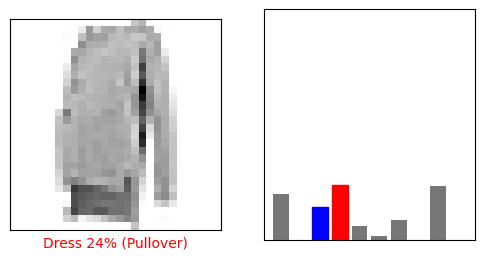

In [34]:
show_predict_result(66)

จากภาพที่คุณอัปโหลดมา ดูเหมือนว่าจะเป็นการแสดงผลลัพธ์จากการทำนายภาพของโมเดล CNN ที่ทำการจำแนกประเภทเสื้อผ้า (Fashion MNIST dataset) โดยมีสองส่วน:

1. **ภาพทางซ้าย**: เป็นภาพของเสื้อผ้า (ในที่นี้คือ "Dress") ที่โมเดลทำนายออกมา

   * ภาพมีความละเอียดต่ำและอาจเบลอ เนื่องจากข้อมูลถูกปรับขนาดและแสดงในโทนสีขาวดำ (grayscale)

2. **กราฟทางขวา**: แสดง **กราฟแท่ง** ของความน่าจะเป็นที่โมเดลทำนายไว้สำหรับแต่ละคลาส (10 คลาสที่เป็นไปได้)

   * **บาร์สีน้ำเงิน** คือคลาสที่โมเดลทำนายว่าเป็น **Dress** (คลาสที่โมเดลมั่นใจที่สุด)
   * **บาร์สีแดง** คือ **Pullover** ซึ่งเป็นคลาสจริง (true label)
   * ขนาดของบาร์แสดงความมั่นใจ (probability) ที่โมเดลมีต่อแต่ละคลาส

     * โมเดลทำนาย **Dress** เป็นคลาสที่มีความน่าจะเป็นสูงสุด 24% (ซึ่งต่ำกว่าความมั่นใจที่ควรจะเป็น)
     * คลาสที่โมเดลทำนายผิดคือ **Pullover** ซึ่งมีความน่าจะเป็นประมาณ 40% ในกราฟ

### 📚 สรุป:

* **ภาพทางซ้าย**: คือภาพที่โมเดลทำนาย
* **กราฟทางขวา**: คือการแสดงความน่าจะเป็นของแต่ละคลาสที่โมเดลทำนาย
* **สี**:

  * **น้ำเงิน**: คลาสที่โมเดลทำนายว่าเป็น
  * **แดง**: คลาสจริง (label)


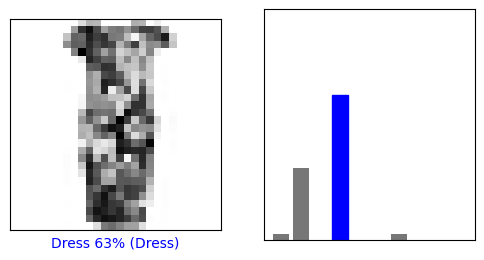

In [35]:
show_predict_result(100)

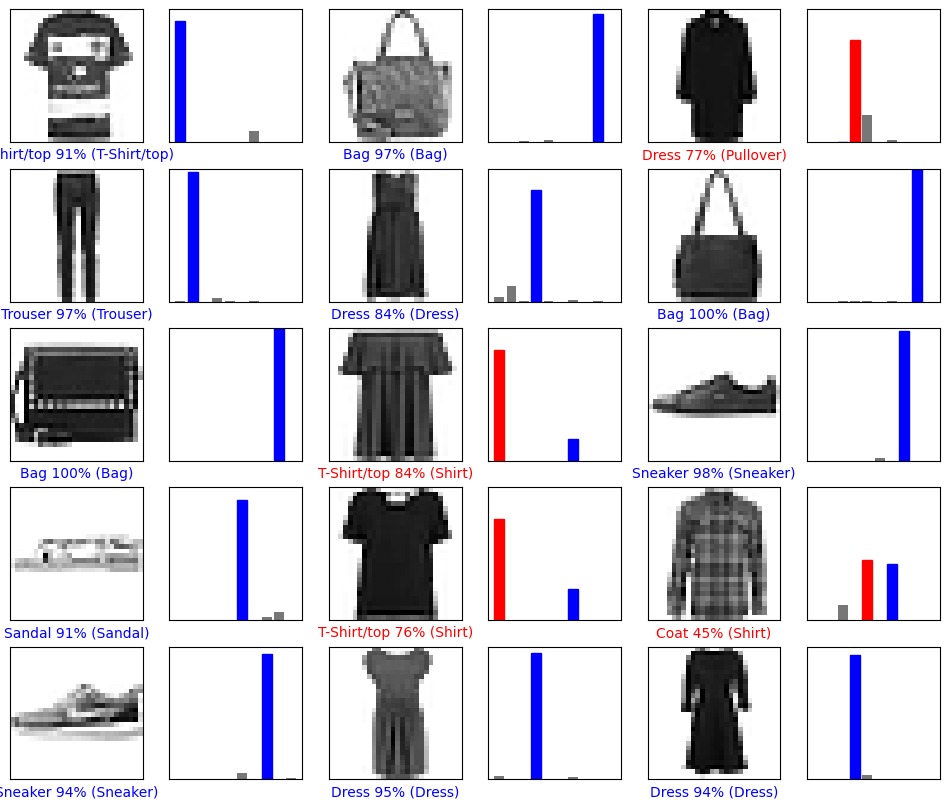

In [36]:
num_rows = 5
num_cols = 3
num_images = num_rows * num_cols
start_index = 2000
plt.figure(figsize=(4*num_cols, 2 * num_rows))
for i in range(num_images):
    plt.subplot(num_rows, 2 * num_cols, 2 * i + 1)
    plot_image(i + start_index -1, predictions, y_test, X_te)
    plt.subplot(num_rows, 2 * num_cols, 2 * i + 2)
    plot_prob_barchart(i + start_index -1, predictions, y_test)
plt.show()